<p style="text-align:center">
PSY 381D <b>Brain Connectivity</b>, Spring 2019


<img style="width: 700px; padding: 0px;" src="https://github.com/sathayas/JupyterConnectivitySpring2019/blob/master/Images/Banner.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> fMRI task networks </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>April 1, 2019</b></p>

<hr style="height:5px;border:none" />

# 1. Data
<hr style="height:1px;border:none" />

## Task fMRI data

Up until now, we have been dealing with resting-state fMRI data to which there is no task associated. However, the majority of fMRI studies involve some cognitive tasks. fMRI data are acquired while subjects are engaged in tasks. Today, we will analyze a task-based fMRI data set from OpenNeuro.org. In particular, we will examine the language and motor task fMRI data [(ds114)](https://openneuro.org/datasets/ds000114/versions/00001). 

All intermediary data files, as well as network data files for today are found in the directory **`DataTaskNetwork`**.

### Language task
The language task for this data set is referred as the covert verb generation task. A subject sees an alphabet on a screen, and the subject is instructed to generate as many verbs as possible starting the the letter projected on screen.

### Motor task
The motor task, referred as the finger foot lips task, involves a subject to move his/her fingers, foot, or lips. In particular, a visual cue (a picture of fingers, a foot, or lips) is given on the screen and the subject is instructed to wiggle fingers on the dominant hand, flex the dominant foot, or purse lips, depending on the cue.

### Typical task fMRI data analysis
In a typical task fMRI data analysis, a predicted fMRI signal is fitted to the fMRI time series data in a linear regression model (at each voxel separately). Any voxels showing significant association with the predicted signal are declared as **activation**. 

## Image data
For today's exercise, we will examine two flavors of fMRI data. In one type of fMRI data, the predicted fMRI signal has been regressed out, leaving the residual fMRI time series data for the construction of brain networks. In the other version, the predicted fMRI signal is not regressed out but left in the fMRI time series, to be used in construction of brain networks.

Just FYI, the fMRI data have gone through a typical fMRI data pre-processing steps (a topic for our future class). This includes warping the brain to the template brain shape, band-pass filtering, and global signal correction.

## Task information
Along with the fMRI image data, you need the information about the task associated with the fMRI experiment. Typical task information includes onset times and durations of a task (or tasks). Here is an example of the task information for the language task.
```
0       30.000000       1
60      30.000000       1
120     30.000000       1
180     30.000000       1
240     30.000000       1
300     30.000000       1
360     30.000000       1
```
The first column corresponds to the onset time of each stimulus (or a task), the second column is the duration of the stimulus, and the third column is the weight.

It is assumed that these stimuli provokes neuronal responses. However, the resulting neuronal responses can only be observed by fMRI, an indirect measure based on blood flow and oxygenation. So the predicted fMRI signal takes into account of the delay, as well as the temporal blurring (known as the hemodynamic response function (HRF)) inherent in fMRI. Here is the plot of the predicted fMRI signal for the language task.

`<PlotTaskTimeSeries.py>`

In [1]:
%matplotlib inline

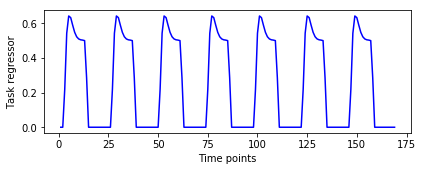

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt


##### First, covert verb generation task
fTask = 'DataTaskNetwork/GLM_model_covertverb.npz'
GLM = np.load(fTask)['X']

plt.figure(figsize=[6,2.5])
timeVec = np.arange(1,GLM.shape[0]+1)
    
plt.subplot(111)
plt.plot(timeVec,GLM[:,0],'b-')
plt.xlabel('Time points')
plt.ylabel('Task regressor')
plt.subplots_adjust(bottom=0.2, right=0.975)
plt.show()

And here are predicted fMRI signals for the finger, foot, and lip tasks for the motor fMRI data.

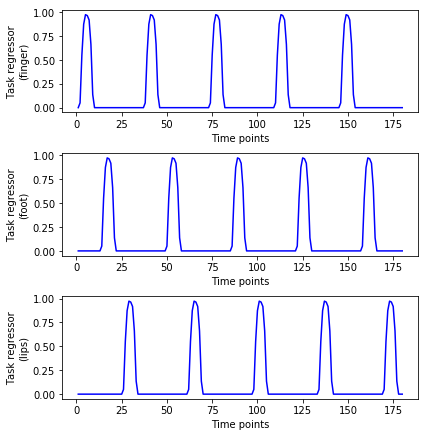

In [5]:
##### Second, finger foot lips task
fTask = 'DataTaskNetwork/GLM_model_fingerfootlips.npz'
GLM = np.load(fTask)['X']
taskList = ['finger','foot','lips']
indTask = [0,2,4]

plt.figure(figsize=[6,6])
timeVec = np.arange(1,GLM.shape[0]+1)
for i, iTask in enumerate(taskList):
    plt.subplot(3,1,i+1)
    plt.plot(timeVec,GLM[:,indTask[i]],'b-')
    plt.xlabel('Time points')
    plt.ylabel('Task regressor\n('+iTask+')')
plt.subplots_adjust(bottom=0.075, right=0.975, left=0.15, top=0.975,
                    hspace=0.4)
plt.show()

The predicted fMRI signals above will be regressed out from the fMRI data for the "regressed out" version of data.

## Network data

As I mentioned earlier, there are two types of processed fMRI time series data: one with the predicted fMRI signals regressed out, and the other without the signals regressed out. Based on these fMRI data, mean ROI time series data are extracted using the Rt2 atlas (i.e., Craddock Rt 2-level atlas) with K=200.

### Masking the time series
Now that you have mean ROI time series data, you can form networks. However, for task-based fMRI networks, you only focus on the time points that correspond to tasks. This is done by selecting time points that are greater than 0. This is done for both the regressed-out data as well as non-regressed-out data.

### Correlation matrix & thresholding
Once the task time points are extracted, then the rest of network construction process (calculating a correlation matrix and thresholding) is the same as the resting-state fMRI network. Since the time series is masked for different tasks, it is possible to form a network corresponding to a particular task from the same fMRI data. 

### List of network data
For your convenience, I formed networks for today's demonstration. These networks are formed at the target average degree of 20.
* **Language task**
  * ***Task regressed-out network***: `fMRI_covertverb_r_bp_reg_Rt2_K200_deg20.adjlist`
  * ***Task non-regressed-out network***: `fMRI_covertverb_nomodel_r_bp_reg_Rt2_K200_deg20.adjlist`
  * ***Resting-state network***: `fMRI_covertverb_r_bp_reg_Rt2_K200_deg20_rest.adjlist`
    * This network is formed by concatenating time points that are between stimuli (no task period). 
* **Motor task**
  * ***Task regressed-out networks***
    * Finger: `fMRI_fingerfootlips_r_bp_reg_Rt2_K200_deg20_finger.adjlist`
    * Foot: `fMRI_fingerfootlips_r_bp_reg_Rt2_K200_deg20_foot.adjlist`
    * Lips: `fMRI_fingerfootlips_r_bp_reg_Rt2_K200_deg20_lips.adjlist`
  * ***Task non-regressed-out networks***
    * Finger: `fMRI_fingerfootlips_nomodel_r_bp_reg_Rt2_K200_deg20_finger.adjlist`
    * Foot: `fMRI_fingerfootlips_nomodel_r_bp_reg_Rt2_K200_deg20_foot.adjlist`
    * Lips: `fMRI_fingerfootlips_nomodel_r_bp_reg_Rt2_K200_deg20_lips.adjlist`

# 2. Degree centrality
<hr style="height:1px;border:none" />

## Language task
Let us examine the task fMRI networks. First, the language task networks. Let us take a look at the degree centrality so that we can figure out which nodes are highly connected (or hubs) in these networks. I am visualizing the task regressed-out network, the task non-regressed-out network, as well as the resting-state network (absence of task).

`<DegreeCentral.py>`

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


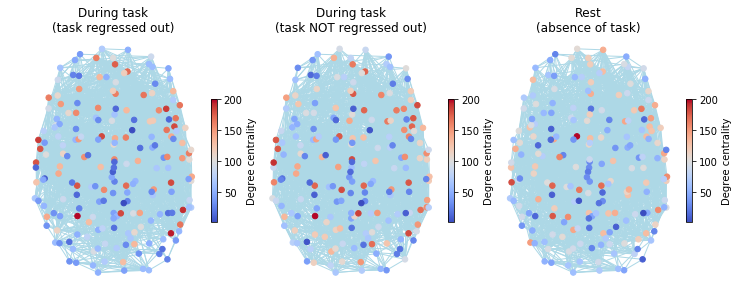

In [2]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


#
#  First, covert verb generation task
#

###### loading the coordinates for nodes
fTS = 'DataTaskNetwork/fMRI_covertverb_r_bp_reg_Rt2_K200.npz'
infile = np.load(fTS)
nodes = infile['nodes']
xyz = infile['xyz']


###### loading network data
# task (task regressed out)
fNet_task_reg = 'DataTaskNetwork/fMRI_covertverb_r_bp_reg_Rt2_K200_deg20.adjlist'
G_task_reg = nx.read_adjlist(fNet_task_reg, nodetype=int)
# task (task NOT regressed out)
fNet_task_noreg = 'DataTaskNetwork/fMRI_covertverb_nomodel_r_bp_reg_Rt2_K200_deg20.adjlist'
G_task_noreg = nx.read_adjlist(fNet_task_noreg, nodetype=int)
# rest (absence of task)
fNet_rest = 'DataTaskNetwork/fMRI_covertverb_r_bp_reg_Rt2_K200_deg20_rest.adjlist'
G_rest = nx.read_adjlist(fNet_rest, nodetype=int)
# consolidating all into a list
G_list = [G_task_reg, G_task_noreg, G_rest]
listLabel = ['During task\n(task regressed out)',
             'During task\n(task NOT regressed out)',
             'Rest\n(absence of task)']


####### degree centrality
Cdeg_list = []
for iG in G_list:
    Cdeg = nx.degree_centrality(iG)
    Cdeg_list.append(Cdeg)





    
###### visualizing the degree centrality
# dictionary of xy-coordinates
pos = {}
for iROI in range(len(nodes)):
    pos[nodes[iROI]] = xyz[iROI,:2]
    
# Loop over K for visualization
plt.figure(figsize=[10,4])
for i,iG in enumerate(G_list):

    plt.subplot(1,3,i+1)
    nx.draw_networkx_nodes(iG, pos, 
                           cmap=plt.cm.coolwarm,
                           node_color=list(Cdeg_list[i].values()),
                           node_size=30)
    nx.draw_networkx_edges(iG, pos, edge_color='lightblue')
    plt.axis('off')
    plt.title(listLabel[i])
    vmin = min(Cdeg_list[i])
    vmax = max(Cdeg_list[i])
    sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                               norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = plt.colorbar(sm, shrink=0.5)
    cbar.ax.set_ylabel('Degree centrality')
    
plt.subplots_adjust(left=0.01, right=0.97, wspace=0.1, bottom=0.025)
plt.show()

It seems like the degree centrality is similar between the regressed-out and non-regressed-out networks.

### Exercise
1. **Degree centrality comparison**. Plot the degree centralities from the (a) regressed-out, (b) non-regressed-out, and (c) rest networks. That is, plot the degree centralities from
  * (a) against (b)
  * (a) against (c)
  * (b) against (c)

  One on the x-axis, the other on the y-axis.

## Motor task

Now let us examine the degree centrality during the motor task.

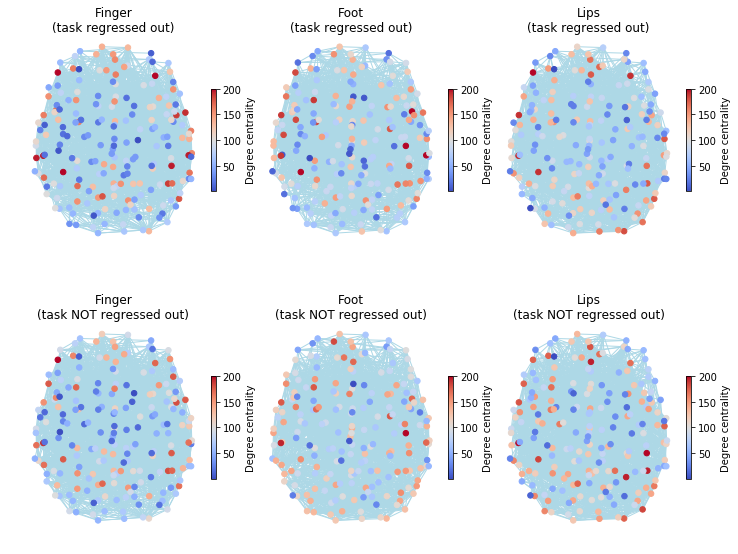

In [3]:
#
#  Second, finger foot lips task
#


###### loading network data
# task (task regressed out), finger
fNet_reg_finger = 'DataTaskNetwork/fMRI_fingerfootlips_r_bp_reg_Rt2_K200_deg20_finger.adjlist'
G_reg_finger = nx.read_adjlist(fNet_reg_finger, nodetype=int)
# task (task regressed out), foot
fNet_reg_foot = 'DataTaskNetwork/fMRI_fingerfootlips_r_bp_reg_Rt2_K200_deg20_foot.adjlist'
G_reg_foot = nx.read_adjlist(fNet_reg_foot, nodetype=int)
# task (task regressed out), lips
fNet_reg_lips = 'DataTaskNetwork/fMRI_fingerfootlips_r_bp_reg_Rt2_K200_deg20_lips.adjlist'
G_reg_lips = nx.read_adjlist(fNet_reg_lips, nodetype=int)
# task (task NOT regressed out), finger
fNet_noreg_finger = 'DataTaskNetwork/fMRI_fingerfootlips_nomodel_r_bp_reg_Rt2_K200_deg20_finger.adjlist'
G_noreg_finger = nx.read_adjlist(fNet_noreg_finger, nodetype=int)
# task (task NOT regressed out), foot
fNet_noreg_foot = 'DataTaskNetwork/fMRI_fingerfootlips_nomodel_r_bp_reg_Rt2_K200_deg20_foot.adjlist'
G_noreg_foot = nx.read_adjlist(fNet_noreg_foot, nodetype=int)
# task (task NOT regressed out), lips
fNet_noreg_lips = 'DataTaskNetwork/fMRI_fingerfootlips_nomodel_r_bp_reg_Rt2_K200_deg20_lips.adjlist'
G_noreg_lips = nx.read_adjlist(fNet_noreg_lips, nodetype=int)
# consolidating all into a list
G_list = [G_reg_finger, G_reg_foot, G_reg_lips,
          G_noreg_finger, G_noreg_foot, G_noreg_lips]
listLabel = ['Finger\n(task regressed out)',
             'Foot\n(task regressed out)',
             'Lips\n(task regressed out)',
             'Finger\n(task NOT regressed out)',
             'Foot\n(task NOT regressed out)',
             'Lips\n(task NOT regressed out)']



####### degree centrality
Cdeg_list = []
for iG in G_list:
    Cdeg = nx.degree_centrality(iG)
    Cdeg_list.append(Cdeg)





    
###### visualizing the degree centrality
# dictionary of xy-coordinates
pos = {}
for iROI in range(len(nodes)):
    pos[nodes[iROI]] = xyz[iROI,:2]
    
# Loop over K for visualization
plt.figure(figsize=[10,8])
for i,iG in enumerate(G_list):

    plt.subplot(2,3,i+1)
    nx.draw_networkx_nodes(iG, pos, 
                           cmap=plt.cm.coolwarm,
                           node_color=list(Cdeg_list[i].values()),
                           node_size=30)
    nx.draw_networkx_edges(iG, pos, edge_color='lightblue')
    plt.axis('off')
    plt.title(listLabel[i])
    vmin = min(Cdeg_list[i])
    vmax = max(Cdeg_list[i])
    sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                               norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = plt.colorbar(sm, shrink=0.5)
    cbar.ax.set_ylabel('Degree centrality')
    
plt.subplots_adjust(left=0.01, right=0.97, wspace=0.1, bottom=0.025,
                    hspace=0.4)
plt.show()

It seems that the degree centrality is somewhat similar between the regressed-out and non-regressed-out networks.

# 3. Modularity
<hr style="height:1px;border:none" />

Now we examine the modular organization of task fMRI networks. We find the modular organization with the Louvain method. In the following figures, different modules are shown in different colors.

## Language task

`<Modularity.py>`

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


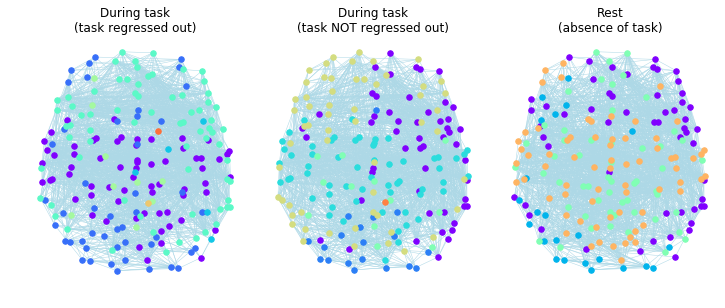

In [5]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import community   # Louvain method


##### Custom distinct color function --- to be used later
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

#
#  First, covert verb generation task
#

###### loading the coordinates for nodes
fTS = 'DataTaskNetwork/fMRI_covertverb_r_bp_reg_Rt2_K200.npz'
infile = np.load(fTS)
nodes = infile['nodes']
xyz = infile['xyz']


###### loading network data
# task (task regressed out)
fNet_task_reg = 'DataTaskNetwork/fMRI_covertverb_r_bp_reg_Rt2_K200_deg20.adjlist'
G_task_reg = nx.read_adjlist(fNet_task_reg, nodetype=int)
# task (task NOT regressed out)
fNet_task_noreg = 'DataTaskNetwork/fMRI_covertverb_nomodel_r_bp_reg_Rt2_K200_deg20.adjlist'
G_task_noreg = nx.read_adjlist(fNet_task_noreg, nodetype=int)
# rest (absence of task)
fNet_rest = 'DataTaskNetwork/fMRI_covertverb_r_bp_reg_Rt2_K200_deg20_rest.adjlist'
G_rest = nx.read_adjlist(fNet_rest, nodetype=int)
# consolidating all into a list
G_list = [G_task_reg, G_task_noreg, G_rest]
listLabel = ['During task\n(task regressed out)',
             'During task\n(task NOT regressed out)',
             'Rest\n(absence of task)']


####### Community detection
# Community detection with the Louvain method
partition_list = []
for iG in G_list:
    partition = community.best_partition(iG)
    partition_list.append(partition)





    
###### visualizing the modular organization
# dictionary of xy-coordinates
pos = {}
for iROI in range(len(nodes)):
    pos[nodes[iROI]] = xyz[iROI,:2]
    
# loop over networks for visualization
plt.figure(figsize=[10,4])
for i,iG in enumerate(G_list):

    plt.subplot(1,3,i+1)
    nComm = max([comm for comm in partition_list[i].values()])+1
    node_color_list = get_cmap(nComm+1,'rainbow')
    for iComm in range(nComm):
        nodeList = [iNode for iNode,Comm in partition_list[i].items()
                    if Comm==iComm]
        nx.draw_networkx_nodes(iG, pos, 
                               nodelist=nodeList,
                               node_color = np.array([node_color_list(iComm)]),
                               node_size=30)
    nx.draw_networkx_edges(iG, pos, width=0.5,
                           edge_color='lightblue')
    plt.title(listLabel[i])
    plt.axis('off')
    
plt.subplots_adjust(left=0.01, right=0.97, wspace=0.1, bottom=0.025)
plt.show()

Since the task-related fMRI signals are not regressed out in the non-regressed-out network, there is a module on the left hemisphere that likely correspond to fMRI activation. Such a module does not seem to exist in the regressed-out network. 

## Motor task

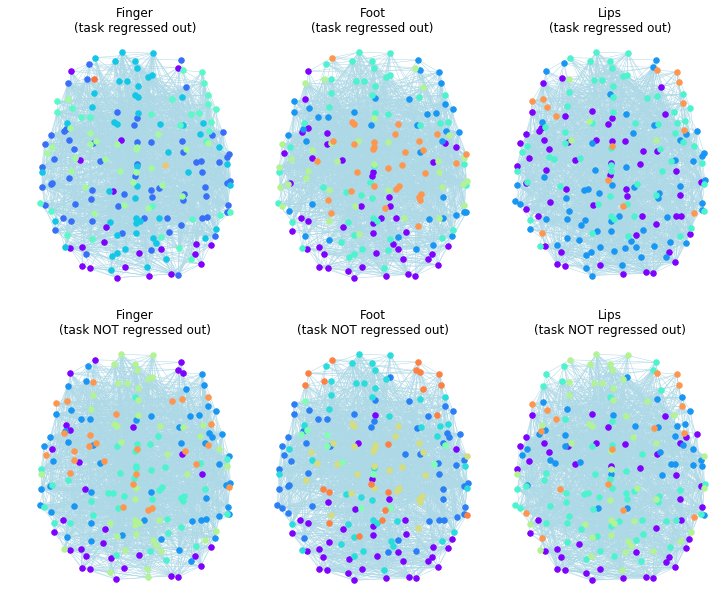

In [8]:
#
#  Second, finger foot lips task
#


###### loading network data
# task (task regressed out), finger
fNet_reg_finger = 'DataTaskNetwork/fMRI_fingerfootlips_r_bp_reg_Rt2_K200_deg20_finger.adjlist'
G_reg_finger = nx.read_adjlist(fNet_reg_finger, nodetype=int)
# task (task regressed out), foot
fNet_reg_foot = 'DataTaskNetwork/fMRI_fingerfootlips_r_bp_reg_Rt2_K200_deg20_foot.adjlist'
G_reg_foot = nx.read_adjlist(fNet_reg_foot, nodetype=int)
# task (task regressed out), lips
fNet_reg_lips = 'DataTaskNetwork/fMRI_fingerfootlips_r_bp_reg_Rt2_K200_deg20_lips.adjlist'
G_reg_lips = nx.read_adjlist(fNet_reg_lips, nodetype=int)
# task (task NOT regressed out), finger
fNet_noreg_finger = 'DataTaskNetwork/fMRI_fingerfootlips_nomodel_r_bp_reg_Rt2_K200_deg20_finger.adjlist'
G_noreg_finger = nx.read_adjlist(fNet_noreg_finger, nodetype=int)
# task (task NOT regressed out), foot
fNet_noreg_foot = 'DataTaskNetwork/fMRI_fingerfootlips_nomodel_r_bp_reg_Rt2_K200_deg20_foot.adjlist'
G_noreg_foot = nx.read_adjlist(fNet_noreg_foot, nodetype=int)
# task (task NOT regressed out), lips
fNet_noreg_lips = 'DataTaskNetwork/fMRI_fingerfootlips_nomodel_r_bp_reg_Rt2_K200_deg20_lips.adjlist'
G_noreg_lips = nx.read_adjlist(fNet_noreg_lips, nodetype=int)
# consolidating all into a list
G_list = [G_reg_finger, G_reg_foot, G_reg_lips,
          G_noreg_finger, G_noreg_foot, G_noreg_lips]
listLabel = ['Finger\n(task regressed out)',
             'Foot\n(task regressed out)',
             'Lips\n(task regressed out)',
             'Finger\n(task NOT regressed out)',
             'Foot\n(task NOT regressed out)',
             'Lips\n(task NOT regressed out)']



####### Community detection
# Community detection with the Louvain method
partition_list = []
for iG in G_list:
    partition = community.best_partition(iG)
    partition_list.append(partition)





    
###### visualizing the degree centrality
# dictionary of xy-coordinates
pos = {}
for iROI in range(len(nodes)):
    pos[nodes[iROI]] = xyz[iROI,:2]
    
# Loop over K for visualization
plt.figure(figsize=[10,9])
for i,iG in enumerate(G_list):

    plt.subplot(2,3,i+1)
    nComm = max([comm for comm in partition_list[i].values()])+1
    node_color_list = get_cmap(nComm+1,'rainbow')
    for iComm in range(nComm):
        nodeList = [iNode for iNode,Comm in partition_list[i].items()
                    if Comm==iComm]
        nx.draw_networkx_nodes(iG, pos, 
                               nodelist=nodeList,
                               node_color = np.array([node_color_list(iComm)]),
                               node_size=30)
    nx.draw_networkx_edges(iG, pos, width=0.5,
                           edge_color='lightblue')
    plt.title(listLabel[i])
    plt.axis('off')
    
plt.subplots_adjust(left=0.01, right=0.97, wspace=0.1, bottom=0.025,
                    hspace=0.2)
plt.show()

# 4. Comparing modular organizations with Jaccard
<hr style="height:1px;border:none" />

Examining modular organizations between different tasks.

# *Further readings*

<hr style="height:1px;border:none" />

* Whitfield-Gabrieli S, Nieto-Castanon A. 2012. Conn: a functional connectivity toolbox for correlated and anticorrelated brain networks. Brain Connectivity 2:125-141.
